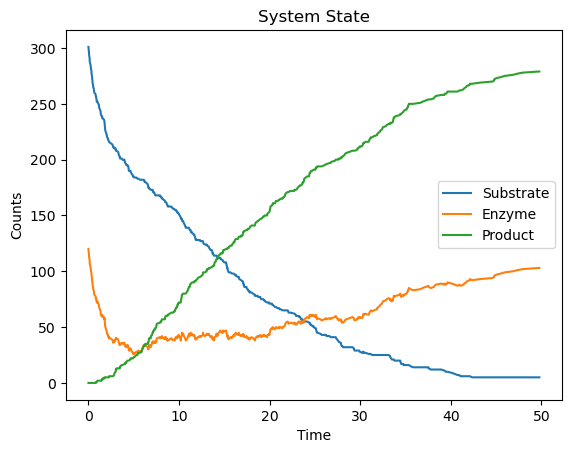

In [4]:
#Implementation of the Stochastic Simulation Algorithm
#(or Gillespie's algorithm)on Michaelis-Menten system
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Set random seed
random.seed(100)

# Stoichiometric matrix
V = np.array([[-1, 1, 0],
              [-1, 1, 1],
              [1, -1, -1],
              [0, 0, 1]])

# Parameters and initial conditions
nA = 6.023e23  # Avogadro’s number
vol = 1e-15  # volume of system
X = np.zeros(4)
X[0] = round(5e-7 * nA * vol)  # molecules of substrate
X[1] = round(2e-7 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
t = 0
tfinal = 50

# Initialize lists to store system states
time_points = []
substrate_counts = []
enzyme_counts = []
product_counts = []

while t < tfinal:
    # Record system state
    time_points.append(t)
    substrate_counts.append(X[0])
    enzyme_counts.append(X[1])
    product_counts.append(X[3])

    a = np.zeros(3)
    a[0] = c[0] * X[0] * X[1]
    a[1] = c[1] * X[2]
    a[2] = c[2] * X[2]
    asum = np.sum(a)
    cumulative_sum = np.cumsum(a / asum)
    rand_num = random.random()
    j = np.min(np.where(rand_num < cumulative_sum))
    tau = math.log(1 / random.random()) / asum
    X += V[:, j]
   
    t += tau
    
     
# Convert lists to NumPy arrays
time_points = np.array(time_points)
substrate_counts = np.array(substrate_counts)
enzyme_counts = np.array(enzyme_counts)
product_counts = np.array(product_counts)

# Plot the system state
plt.plot(time_points, substrate_counts, label='Substrate')
plt.plot(time_points, enzyme_counts, label='Enzyme')
plt.plot(time_points, product_counts, label='Product')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('System State')
plt.legend()
plt.show()


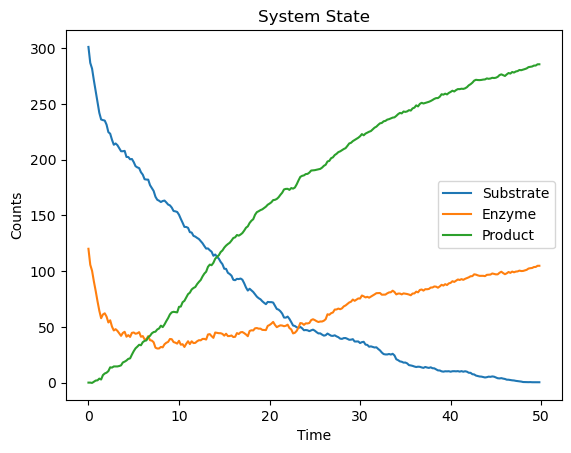

In [3]:
# Simple implimentation of Euler–Maruyama method to simulate the
#Chemical Langevin Eqution for the Michalis-Menten sysyem
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Set random seed
random.seed(100)

# Stoichiometric matrix
V = np.array([[-1, 1, 0],
              [-1, 1, 1],
              [1, -1, -1],
              [0, 0, 1]])

# Parameters and initial conditions
nA = 6.023e23  # Avogadro’s number
vol = 1e-15  # volume of system
Y = np.zeros(4)
Y[0] = round(5e-7 * nA * vol)  # molecules of substrate
Y[1] = round(2e-7 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
tfinal = 50
L = 250
tau = tfinal / L  # step size

# Initialize lists to store system states
time_points = []
substrate_counts = []
enzyme_counts = []
product_counts = []

for k in range(L):
    # Record system state
    time_points.append(k * tau)
    substrate_counts.append(Y[0])
    enzyme_counts.append(Y[1])
    product_counts.append(Y[3])

    a = np.zeros(3)
    a[0] = c[0] * Y[0] * Y[1]
    a[1] = c[1] * Y[2]
    a[2] = c[2] * Y[2]
    d = np.zeros(3)
    d[0] = tau * a[0] + math.sqrt(abs(tau * a[0])) * random.gauss(0, 1)
    d[1] = tau * a[1] + math.sqrt(abs(tau * a[1])) * random.gauss(0, 1)
    d[2] = tau * a[2] + math.sqrt(abs(tau * a[2])) * random.gauss(0, 1)
    Y = Y + d[0] * V[:, 0] + d[1] * V[:, 1] + d[2] * V[:, 2]

# Convert lists to NumPy arrays
time_points = np.array(time_points)
substrate_counts = np.array(substrate_counts)
enzyme_counts = np.array(enzyme_counts)
product_counts = np.array(product_counts)

# Plot the system state
plt.plot(time_points, substrate_counts, label='Substrate')
plt.plot(time_points, enzyme_counts, label='Enzyme')
plt.plot(time_points, product_counts, label='Product')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('System State')
plt.legend()
plt.show()


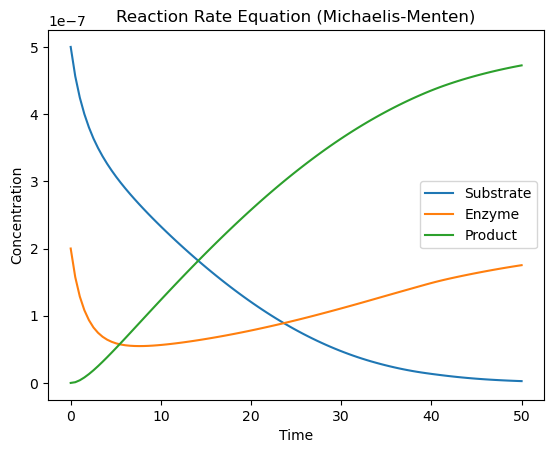

In [6]:
#ODE solution of the Reaction Rate Equation for
# the Michaelis-Menten system.
import numpy as np
from scipy.integrate import odeint

def rre_mm(tspan, yzero):
    # Parameters
    k1 = 1e6
    k2 = 1e-4
    k3 = 0.1

    # Reaction rate equations
    def mm_rre(y, t):
        yprime = np.zeros(4)
        yprime[0] = -k1 * y[0] * y[1] + k2 * y[2]
        yprime[1] = -k1 * y[0] * y[1] + (k2 + k3) * y[2]
        yprime[2] = k1 * y[0] * y[1] - (k2 + k3) * y[2]
        yprime[3] = k3 * y[2]
        return yprime

    # Solve the ODEs
    t = np.linspace(tspan[0], tspan[1], 100)
    y = odeint(mm_rre, yzero, t)

    return t, y

# Example usage
tspan = [0, 50]
yzero = [5e-7, 2e-7, 0, 0]
t, y = rre_mm(tspan, yzero)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(t, y[:, 0], label='Substrate')
plt.plot(t, y[:, 1], label='Enzyme')
plt.plot(t, y[:, 3], label='Product')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Reaction Rate Equation (Michaelis-Menten)')
plt.legend()
plt.show()



In [ ]:
#Comparing the system behaviour for three different types of system

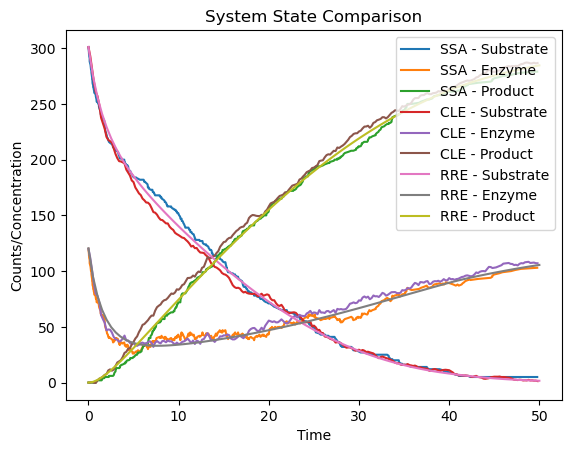

In [11]:
#System 1 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Set random seed
random.seed(100)

# Stoichiometric matrix
V = np.array([[-1, 1, 0],
              [-1, 1, 1],
              [1, -1, -1],
              [0, 0, 1]])

# Parameters and initial conditions
nA = 6.023e23  # Avogadro’s number
vol = 1e-15  # volume of system

# Gillespie
X = np.zeros(4)
X[0] = round(5e-7 * nA * vol)  # molecules of substrate
X[1] = round(2e-7 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
t = 0
tfinal = 50

time_points = []
substrate_counts = []
enzyme_counts = []
product_counts = []

while t < tfinal:
    # Record system state
    time_points.append(t)
    substrate_counts.append(X[0])
    enzyme_counts.append(X[1])
    product_counts.append(X[3])

    a = np.zeros(3)
    a[0] = c[0] * X[0] * X[1]
    a[1] = c[1] * X[2]
    a[2] = c[2] * X[2]
    asum = np.sum(a)
    cumulative_sum = np.cumsum(a / asum)
    rand_num = random.random()
    j = np.min(np.where(rand_num < cumulative_sum))
    tau = math.log(1 / random.random()) / asum
    X += V[:, j]
    t += tau

# Convert lists to NumPy arrays
time_points = np.array(time_points)
substrate_counts = np.array(substrate_counts)
enzyme_counts = np.array(enzyme_counts)
product_counts = np.array(product_counts)

# Cle
Y = np.zeros(4)
Y[0] = round(5e-7 * nA * vol)  # molecules of substrate
Y[1] = round(2e-7 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
tfinal = 50
L = 250
tau = tfinal / L  # step size

time_points2 = []
substrate_counts2 = []
enzyme_counts2 = []
product_counts2 = []

for k in range(L):
    # Record system state
    time_points2.append(k * tau)
    substrate_counts2.append(Y[0])
    enzyme_counts2.append(Y[1])
    product_counts2.append(Y[3])

    a = np.zeros(3)
    a[0] = c[0] * Y[0] * Y[1]
    a[1] = c[1] * Y[2]
    a[2] = c[2] * Y[2]
    d = np.zeros(3)
    d[0] = tau * a[0] + math.sqrt(abs(tau * a[0])) * random.gauss(0, 1)
    d[1] = tau * a[1] + math.sqrt(abs(tau * a[1])) * random.gauss(0, 1)
    d[2] = tau * a[2] + math.sqrt(abs(tau * a[2])) * random.gauss(0, 1)
    Y = Y + d[0] * V[:, 0] + d[1] * V[:, 1] + d[2] * V[:, 2]

# Convert lists to NumPy arrays
time_points2 = np.array(time_points2)
substrate_counts2 = np.array(substrate_counts2)
enzyme_counts2 = np.array(enzyme_counts2)
product_counts2 = np.array(product_counts2)


# rre
tspan = [0, 50]
yzero = [5e-7, 2e-7, 0, 0]
t, y = rre_mm(tspan, yzero)
# Plot the results
plt.plot(time_points, substrate_counts, label='SSA - Substrate')
plt.plot(time_points, enzyme_counts, label='SSA - Enzyme')
plt.plot(time_points, product_counts, label='SSA - Product')

plt.plot(time_points2, substrate_counts2, label='CLE - Substrate')
plt.plot(time_points2, enzyme_counts2, label='CLE - Enzyme')
plt.plot(time_points2, product_counts2, label='CLE - Product')

plt.plot(t, y[:, 0]*vol*nA, label='RRE - Substrate')
plt.plot(t, y[:, 1]*vol*nA, label='RRE - Enzyme')
plt.plot(t, y[:, 3]*vol*nA, label='RRE - Product')

plt.xlabel('Time')
plt.ylabel('Counts/Concentration')
plt.title('System State Comparison')
plt.legend()
plt.show()


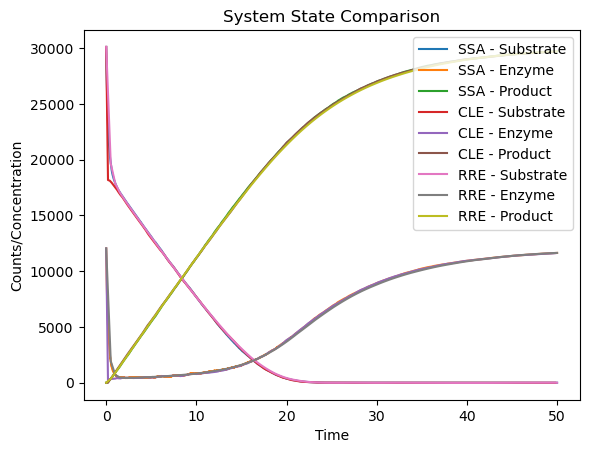

In [12]:
#System 2
#Changing the concentration
# Stoichiometric matrix
V = np.array([[-1, 1, 0],
              [-1, 1, 1],
              [1, -1, -1],
              [0, 0, 1]])

# Parameters and initial conditions
nA = 6.023e23  # Avogadro’s number
vol = 1e-14  # volume of system
# Gillespie
X = np.zeros(4)
X[0] = round(5e-6 * nA * vol)  # molecules of substrate
X[1] = round(2e-6 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
t = 0
tfinal = 50

time_points = []
substrate_counts = []
enzyme_counts = []
product_counts = []

while t < tfinal:
    # Record system state
    time_points.append(t)
    substrate_counts.append(X[0])
    enzyme_counts.append(X[1])
    product_counts.append(X[3])

    a = np.zeros(3)
    a[0] = c[0] * X[0] * X[1]
    a[1] = c[1] * X[2]
    a[2] = c[2] * X[2]
    asum = np.sum(a)
    cumulative_sum = np.cumsum(a / asum)
    rand_num = random.random()
    j = np.min(np.where(rand_num < cumulative_sum))
    tau = math.log(1 / random.random()) / asum
    X += V[:, j]
    t += tau

# Convert lists to NumPy arrays
time_points = np.array(time_points)
substrate_counts = np.array(substrate_counts)
enzyme_counts = np.array(enzyme_counts)
product_counts = np.array(product_counts)

# Cle
Y = np.zeros(4)
Y[0] = round(5e-6 * nA * vol)  # molecules of substrate
Y[1] = round(2e-6 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
tfinal = 50
L = 250
tau = tfinal / L  # step size

time_points2 = []
substrate_counts2 = []
enzyme_counts2 = []
product_counts2 = []

for k in range(L):
    # Record system state
    time_points2.append(k * tau)
    substrate_counts2.append(Y[0])
    enzyme_counts2.append(Y[1])
    product_counts2.append(Y[3])

    a = np.zeros(3)
    a[0] = c[0] * Y[0] * Y[1]
    a[1] = c[1] * Y[2]
    a[2] = c[2] * Y[2]
    d = np.zeros(3)
    d[0] = tau * a[0] + math.sqrt(abs(tau * a[0])) * random.gauss(0, 1)
    d[1] = tau * a[1] + math.sqrt(abs(tau * a[1])) * random.gauss(0, 1)
    d[2] = tau * a[2] + math.sqrt(abs(tau * a[2])) * random.gauss(0, 1)
    Y = Y + d[0] * V[:, 0] + d[1] * V[:, 1] + d[2] * V[:, 2]

# Convert lists to NumPy arrays
time_points2 = np.array(time_points2)
substrate_counts2 = np.array(substrate_counts2)
enzyme_counts2 = np.array(enzyme_counts2)
product_counts2 = np.array(product_counts2)


# rre
tspan = [0, 50]
yzero = [5e-6, 2e-6, 0, 0]
t, y = rre_mm(tspan, yzero)
# Plot the results
plt.plot(time_points, substrate_counts, label='SSA - Substrate')
plt.plot(time_points, enzyme_counts, label='SSA - Enzyme')
plt.plot(time_points, product_counts, label='SSA - Product')

plt.plot(time_points2, substrate_counts2, label='CLE - Substrate')
plt.plot(time_points2, enzyme_counts2, label='CLE - Enzyme')
plt.plot(time_points2, product_counts2, label='CLE - Product')

plt.plot(t, y[:, 0]*vol*nA, label='RRE - Substrate')
plt.plot(t, y[:, 1]*vol*nA, label='RRE - Enzyme')
plt.plot(t, y[:, 3]*vol*nA, label='RRE - Product')


plt.xlabel('Time')
plt.ylabel('Counts/Concentration')
plt.title('System State Comparison')
plt.legend()
plt.show()


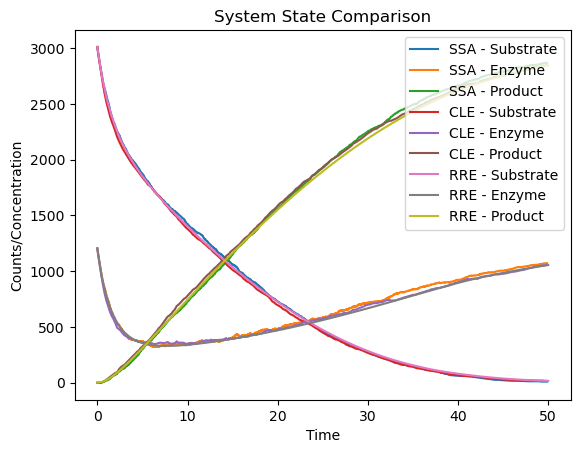

In [13]:
#System 3 
#Changing the volume
# Stoichiometric matrix
V = np.array([[-1, 1, 0],
              [-1, 1, 1],
              [1, -1, -1],
              [0, 0, 1]])

# Parameters and initial conditions
nA = 6.023e23  # Avogadro’s number
vol = 1e-14  # volume of system

# Gillespie
X = np.zeros(4)
X[0] = round(5e-7 * nA * vol)  # molecules of substrate
X[1] = round(2e-7 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
t = 0
tfinal = 50

time_points = []
substrate_counts = []
enzyme_counts = []
product_counts = []

while t < tfinal:
    # Record system state
    time_points.append(t)
    substrate_counts.append(X[0])
    enzyme_counts.append(X[1])
    product_counts.append(X[3])

    a = np.zeros(3)
    a[0] = c[0] * X[0] * X[1]
    a[1] = c[1] * X[2]
    a[2] = c[2] * X[2]
    asum = np.sum(a)
    cumulative_sum = np.cumsum(a / asum)
    rand_num = random.random()
    j = np.min(np.where(rand_num < cumulative_sum))
    tau = math.log(1 / random.random()) / asum
    X += V[:, j]
    t += tau

# Convert lists to NumPy arrays
time_points = np.array(time_points)
substrate_counts = np.array(substrate_counts)
enzyme_counts = np.array(enzyme_counts)
product_counts = np.array(product_counts)

# Cle
Y = np.zeros(4)
Y[0] = round(5e-7 * nA * vol)  # molecules of substrate
Y[1] = round(2e-7 * nA * vol)  # molecules of enzyme
c = np.zeros(3)
c[0] = 1e6 / (nA * vol)
c[1] = 1e-4
c[2] = 0.1
tfinal = 50
L = 250
tau = tfinal / L  # step size

time_points2 = []
substrate_counts2 = []
enzyme_counts2 = []
product_counts2 = []

for k in range(L):
    # Record system state
    time_points2.append(k * tau)
    substrate_counts2.append(Y[0])
    enzyme_counts2.append(Y[1])
    product_counts2.append(Y[3])

    a = np.zeros(3)
    a[0] = c[0] * Y[0] * Y[1]
    a[1] = c[1] * Y[2]
    a[2] = c[2] * Y[2]
    d = np.zeros(3)
    d[0] = tau * a[0] + math.sqrt(abs(tau * a[0])) * random.gauss(0, 1)
    d[1] = tau * a[1] + math.sqrt(abs(tau * a[1])) * random.gauss(0, 1)
    d[2] = tau * a[2] + math.sqrt(abs(tau * a[2])) * random.gauss(0, 1)
    Y = Y + d[0] * V[:, 0] + d[1] * V[:, 1] + d[2] * V[:, 2]

# Convert lists to NumPy arrays
time_points2 = np.array(time_points2)
substrate_counts2 = np.array(substrate_counts2)
enzyme_counts2 = np.array(enzyme_counts2)
product_counts2 = np.array(product_counts2)


# rre
tspan = [0, 50]
yzero = [5e-7, 2e-7, 0, 0]
t, y = rre_mm(tspan, yzero)
# Plot the results
plt.plot(time_points, substrate_counts, label='SSA - Substrate')
plt.plot(time_points, enzyme_counts, label='SSA - Enzyme')
plt.plot(time_points, product_counts, label='SSA - Product')

plt.plot(time_points2, substrate_counts2, label='CLE - Substrate')
plt.plot(time_points2, enzyme_counts2, label='CLE - Enzyme')
plt.plot(time_points2, product_counts2, label='CLE - Product')

plt.plot(t, y[:, 0]*vol*nA, label='RRE - Substrate')
plt.plot(t, y[:, 1]*vol*nA, label='RRE - Enzyme')
plt.plot(t, y[:, 3]*vol*nA, label='RRE - Product')



plt.xlabel('Time')
plt.ylabel('Counts/Concentration')
plt.title('System State Comparison')
plt.legend()
plt.show()
